# Case Study - We are going to analyse and predict the data of the hourly vehicle counts of particular highway in the year of 1995 beginning from the month of August.

#### Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1. Read the data as an hourly Time Series from the '.csv' file and plot the Time Series data.

In [2]:
df = pd.read_csv("Vehicle.csv")

In [3]:
df.head()

,Hour,Vehicles
0,1,699
1,2,346
2,3,193
3,4,191
4,5,193


In [3]:
len(df)

1689

In [4]:
date = pd.date_range(start='8/1/1995',freq='H',periods=1689)
date

DatetimeIndex(['1995-08-01 00:00:00', '1995-08-01 01:00:00',
               '1995-08-01 02:00:00', '1995-08-01 03:00:00',
               '1995-08-01 04:00:00', '1995-08-01 05:00:00',
               '1995-08-01 06:00:00', '1995-08-01 07:00:00',
               '1995-08-01 08:00:00', '1995-08-01 09:00:00',
               ...
               '1995-10-09 23:00:00', '1995-10-10 00:00:00',
               '1995-10-10 01:00:00', '1995-10-10 02:00:00',
               '1995-10-10 03:00:00', '1995-10-10 04:00:00',
               '1995-10-10 05:00:00', '1995-10-10 06:00:00',
               '1995-10-10 07:00:00', '1995-10-10 08:00:00'],
              dtype='datetime64[ns]', length=1689, freq='H')

In [5]:
df['Time_Stamp'] = pd.to_datetime(date,yearfirst=False,dayfirst=False,format="%")
df.head()

,Hour,Vehicles,Time_Stamp
0,1,699,1995-08-01 00:00:00
1,2,346,1995-08-01 01:00:00
2,3,193,1995-08-01 02:00:00
3,4,191,1995-08-01 03:00:00
4,5,193,1995-08-01 04:00:00


In [6]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,Hour,Vehicles
Time_Stamp,,
1995-08-01 00:00:00,1,699
1995-08-01 01:00:00,2,346
1995-08-01 02:00:00,3,193
1995-08-01 03:00:00,4,191
1995-08-01 04:00:00,5,193


In [7]:
df.drop(labels='Hour',axis=1,inplace=True)
df.head()

,Vehicles
Time_Stamp,
1995-08-01 00:00:00,699
1995-08-01 01:00:00,346
1995-08-01 02:00:00,193
1995-08-01 03:00:00,191
1995-08-01 04:00:00,193


In [8]:
from pylab import rcParams

In [9]:
rcParams['figure.figsize'] = 20,8

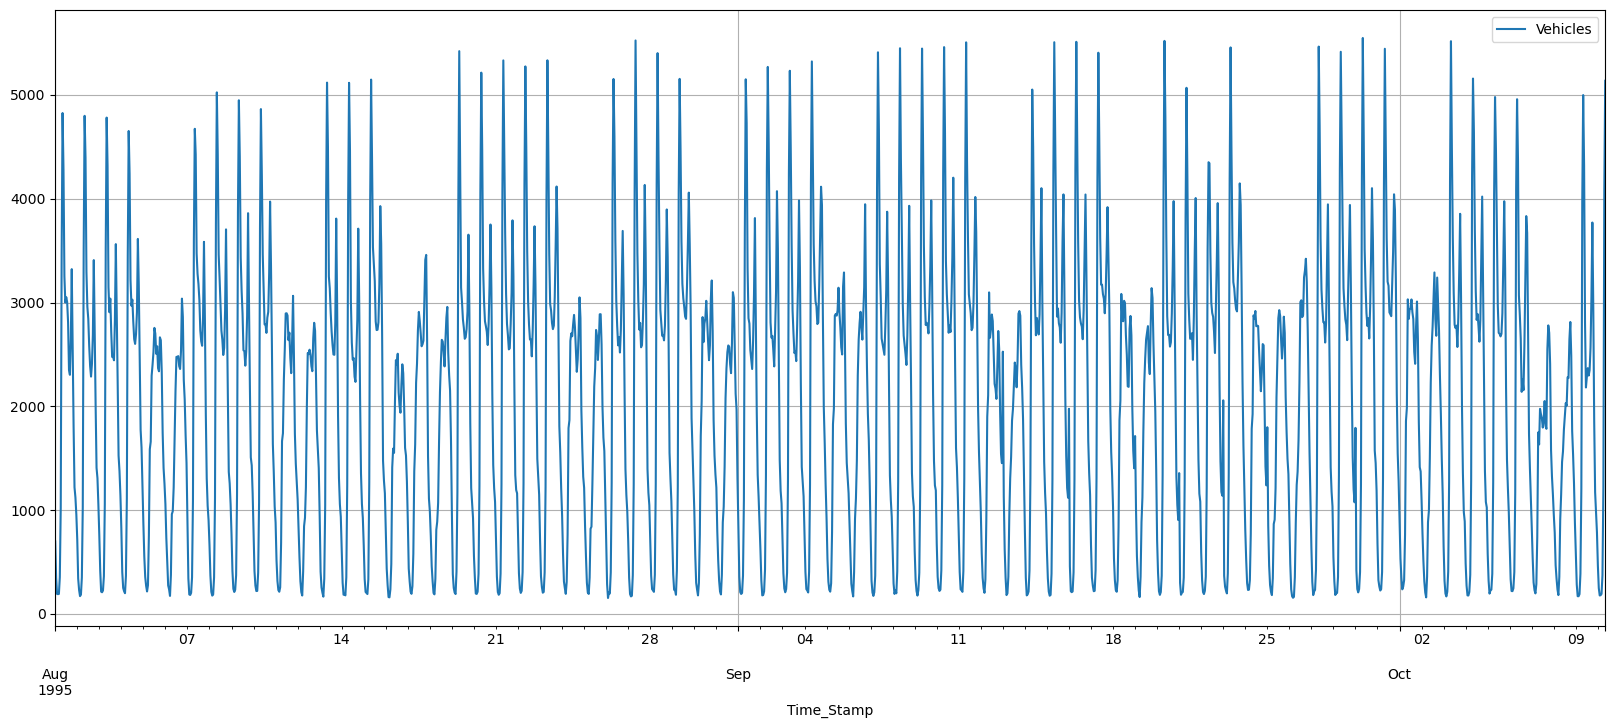

In [10]:
df.plot()
plt.grid();

## 2. Check the basic measures of descriptive statistics of the Time Series. Also, check how many days of data do we have and plot the Time Series with the mean and median of the Time Series.

In [11]:
df.describe()

,Vehicles
count,1689.000000
mean,2060.417999
std,1339.545842
min,154.000000
25%,851.000000
50%,2262.000000
75%,2924.000000
max,5549.000000


In [12]:
print('We have around',1689/24,'days of data.')

We have around 70.375 days of data.


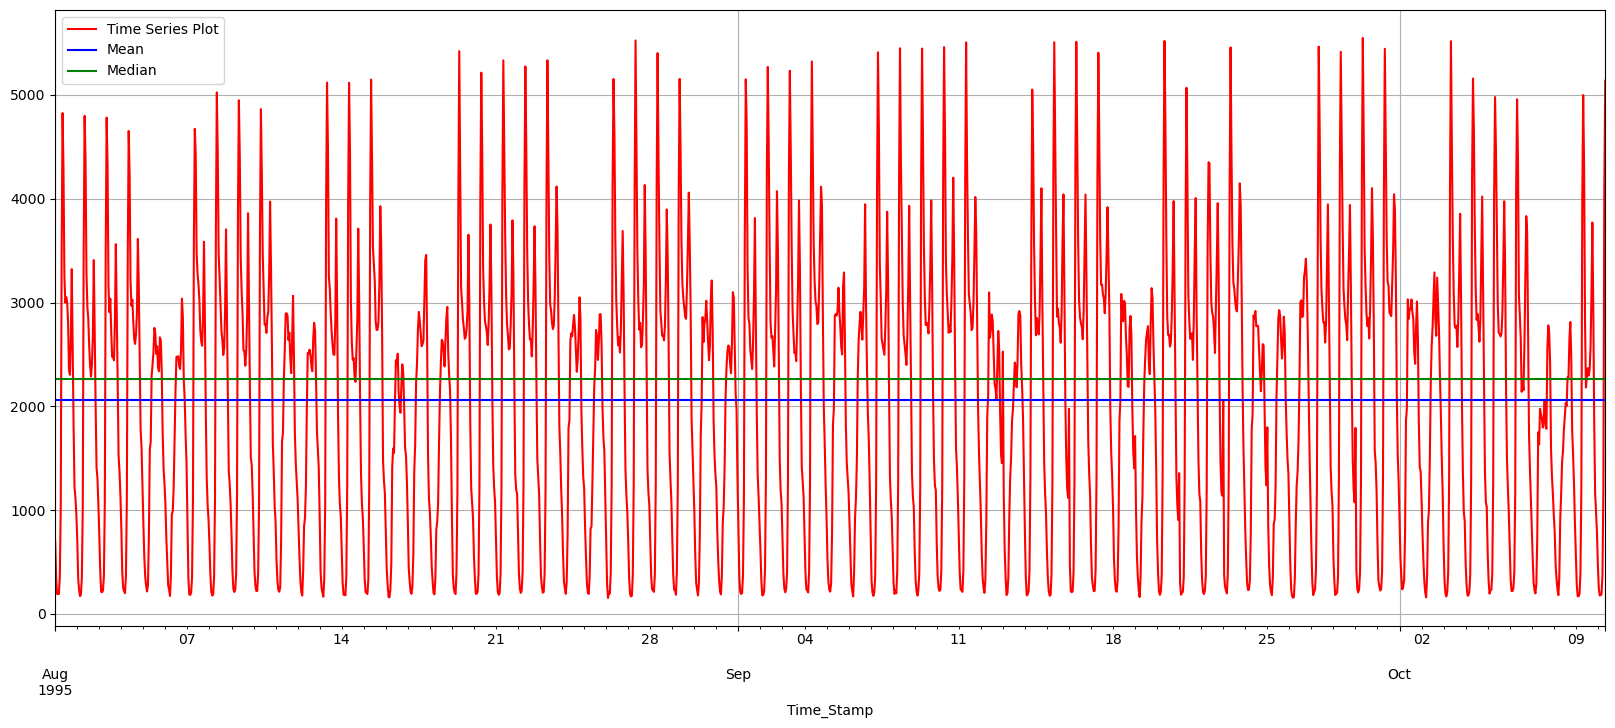

In [13]:
df.plot(color='Red')
plt.axhline(df['Vehicles'].mean(),color='Blue')
plt.axhline(df['Vehicles'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

## 3. Decompose the Time Series to understand the various components.

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


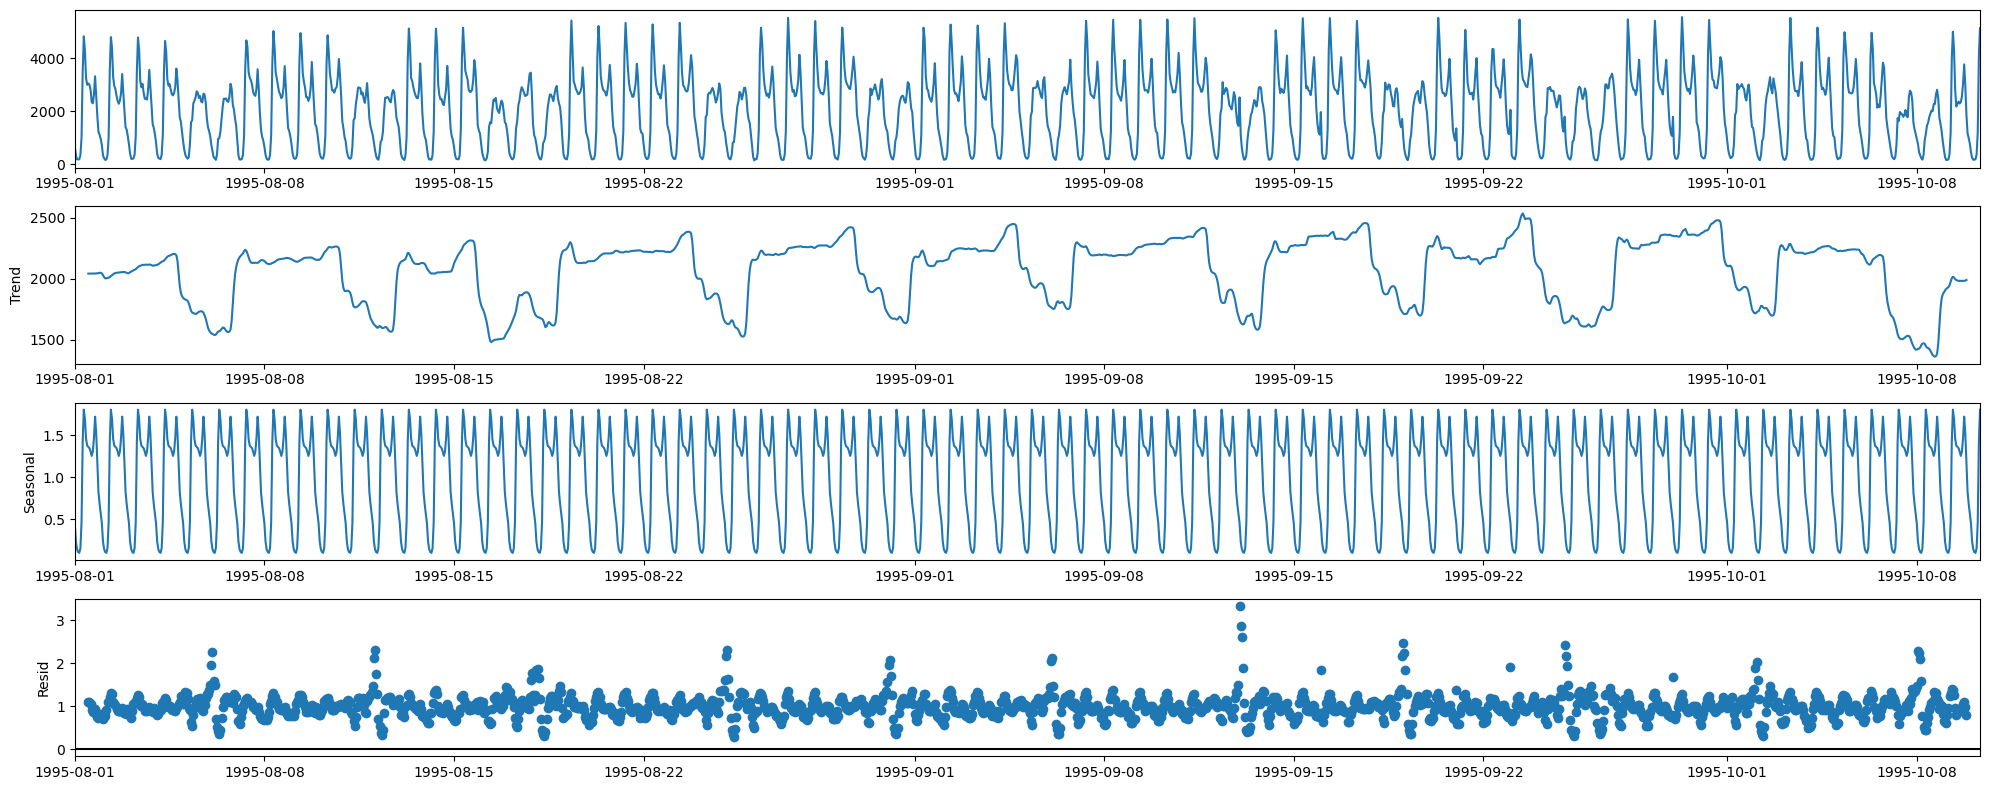

In [15]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [16]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [17]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1995-08-01 00:00:00   NaN
1995-08-01 01:00:00   NaN
1995-08-01 02:00:00   NaN
1995-08-01 03:00:00   NaN
1995-08-01 04:00:00   NaN
                       ..
1995-10-10 04:00:00   NaN
1995-10-10 05:00:00   NaN
1995-10-10 06:00:00   NaN
1995-10-10 07:00:00   NaN
1995-10-10 08:00:00   NaN
Name: trend, Length: 1689, dtype: float64 

Seasonality 
 Time_Stamp
1995-08-01 00:00:00    0.455006
1995-08-01 01:00:00    0.239579
1995-08-01 02:00:00    0.146309
1995-08-01 03:00:00    0.112478
1995-08-01 04:00:00    0.103107
                         ...   
1995-10-10 04:00:00    0.103107
1995-10-10 05:00:00    0.159886
1995-10-10 06:00:00    0.468012
1995-10-10 07:00:00    1.424237
1995-10-10 08:00:00    1.806399
Name: seasonal, Length: 1689, dtype: float64 

Residual 
 Time_Stamp
1995-08-01 00:00:00   NaN
1995-08-01 01:00:00   NaN
1995-08-01 02:00:00   NaN
1995-08-01 03:00:00   NaN
1995-08-01 04:00:00   NaN
                       ..
1995-10-10 04:00:00   NaN
1995-10-10 05:00:00   N

## 4. Split the data into train and test and plot the training and test data.

In [18]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [19]:
print(train.shape)
print(test.shape)

(1182, 1)
(507, 1)


In [20]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
                      Vehicles
Time_Stamp                   
1995-08-01 00:00:00       699
1995-08-01 01:00:00       346
1995-08-01 02:00:00       193
1995-08-01 03:00:00       191
1995-08-01 04:00:00       193 

Last few rows of Training Data 
                      Vehicles
Time_Stamp                   
1995-09-19 01:00:00      1015
1995-09-19 02:00:00       559
1995-09-19 03:00:00       353
1995-09-19 04:00:00       226
1995-09-19 05:00:00       163 

First few rows of Test Data 
                      Vehicles
Time_Stamp                   
1995-09-19 06:00:00       359
1995-09-19 07:00:00       886
1995-09-19 08:00:00      1125
1995-09-19 09:00:00      1753
1995-09-19 10:00:00      2224 

Last few rows of Test Data 
                      Vehicles
Time_Stamp                   
1995-10-10 04:00:00       194
1995-10-10 05:00:00       373
1995-10-10 06:00:00      1218
1995-10-10 07:00:00      4076
1995-10-10 08:00:00      5137 



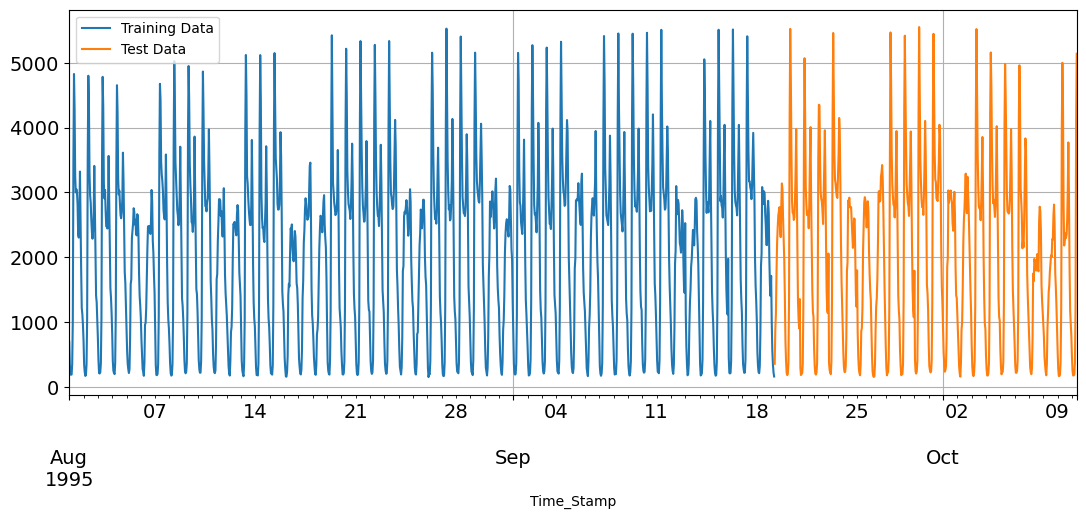

In [21]:
train['Vehicles'].plot(figsize=(13,5), fontsize=14)
test['Vehicles'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Model 1: Build a Linear Regression using the Time Stamped order of occurence of the vehicle count.

In [22]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+1183 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [23]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [24]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
                      Vehicles  time
Time_Stamp                         
1995-08-01 00:00:00       699     1
1995-08-01 01:00:00       346     2
1995-08-01 02:00:00       193     3
1995-08-01 03:00:00       191     4
1995-08-01 04:00:00       193     5 

Last few rows of Training Data 
                      Vehicles  time
Time_Stamp                         
1995-09-19 01:00:00      1015  1178
1995-09-19 02:00:00       559  1179
1995-09-19 03:00:00       353  1180
1995-09-19 04:00:00       226  1181
1995-09-19 05:00:00       163  1182 

First few rows of Test Data 
                      Vehicles  time
Time_Stamp                         
1995-09-19 06:00:00       359  1183
1995-09-19 07:00:00       886  1184
1995-09-19 08:00:00      1125  1185
1995-09-19 09:00:00      1753  1186
1995-09-19 10:00:00      2224  1187 

Last few rows of Test Data 
                      Vehicles  time
Time_Stamp                         
1995-10-10 04:00:00       194  1685
1995

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Vehicles'].values)

LinearRegression()

In [26]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

## Evaluate this model on the test data using Root Mean Squared Error (RMSE).

In [27]:
from sklearn import metrics

In [28]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Vehicles'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1362.674


In [29]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1362.674158


## Model 2: Build a Simple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [31]:
SES_train = train.copy()
SES_test = test.copy()

In [32]:
model_SES = SimpleExpSmoothing(SES_train['Vehicles'])

C:\Users\SUSMITA MANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [33]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\SUSMITA MANNA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [34]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 699.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [35]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1995-09-19 06:00:00    163.318201
1995-09-19 07:00:00    163.318201
1995-09-19 08:00:00    163.318201
1995-09-19 09:00:00    163.318201
1995-09-19 10:00:00    163.318201
                          ...    
1995-10-10 04:00:00    163.318201
1995-10-10 05:00:00    163.318201
1995-10-10 06:00:00    163.318201
1995-10-10 07:00:00    163.318201
1995-10-10 08:00:00    163.318201
Freq: H, Length: 507, dtype: float64

In [36]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Vehicles'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 2322.774


In [37]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.995:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1362.674158
Alpha=0.995:SimpleExponentialSmoothing,2322.773950


## Model 3: Build a Double Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [38]:
DES_train = train.copy()
DES_test = test.copy()

In [39]:
model_DES = Holt(SES_train['Vehicles'])

C:\Users\SUSMITA MANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [40]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\SUSMITA MANNA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [41]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995,True
smoothing_trend,beta,0.995,True
initial_level,l.0,699.000,True
initial_trend,b.0,-353.000,True


In [42]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1995-09-19 06:00:00       99.451324
1995-09-19 07:00:00       36.222309
1995-09-19 08:00:00      -27.006706
1995-09-19 09:00:00      -90.235721
1995-09-19 10:00:00     -153.464736
                           ...     
1995-10-10 04:00:00   -31641.514216
1995-10-10 05:00:00   -31704.743231
1995-10-10 06:00:00   -31767.972246
1995-10-10 07:00:00   -31831.201261
1995-10-10 08:00:00   -31894.430276
Freq: H, Length: 507, dtype: float64

In [43]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Vehicles'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 20198.794


In [44]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1362.674158
Alpha=0.995:SimpleExponentialSmoothing,2322.773950
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",20198.794201


## Model 4: Build a Triple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [45]:
TES_train = train.copy()
TES_test = test.copy()

In [46]:
model_TES = ExponentialSmoothing(SES_train['Vehicles'],trend='additive',seasonal='multiplicative')

C:\Users\SUSMITA MANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [47]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

C:\Users\SUSMITA MANNA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [48]:
model_TES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0025000000000000022,
 'damping_trend': nan,
 'initial_level': 2041.3402777777767,
 'initial_trend': 0.2869949494951243,
 'initial_seasons': array([0.40565102, 0.221275  , 0.13626822, 0.11217353, 0.10617777,
        0.17275697, 0.50294613, 1.52305283, 1.98832928, 1.91985621,
        1.53108573, 1.44752332, 1.45906439, 1.35557564, 1.25731927,
        1.18143903, 1.19726784, 1.34718862, 1.69252141, 1.38792918,
        1.06007175, 0.74667888, 0.68811391, 0.55973406]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1995-09-19 06:00:00     475.444497
1995-09-19 07:00:00    1440.001568
1995-09-19 08:00:00    1874.282479
1995-09-19 09:00:00    1829.169669
1995-09-19 10:00:00    1476.879559
                          ...     
1995-10-10 04:00:00     108.274777
1995-10-10 05:00:00     176.704299
1995-10-10 06:00:00     512.169206
1995-10-10 07:00:00    1551.214414
1995-10-10 08:00:00    2019.013122
Freq: H, Length: 507, dtype: float64

In [50]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Vehicles'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1391.370


In [51]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1362.674158
Alpha=0.995:SimpleExponentialSmoothing,2322.773950
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",20198.794201
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",1391.369859


## Which model performs the best?

Tweak the different parameters for each of these models and try to come up with a better accuracy (less RMSE)

##### Note: You can go ahead and attempt the following questions now or wait until after the mentored learning session. During the mentor learning sessions, you will get clarity on how to solve the following questions.

## Model 5: Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [52]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [53]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Vehicles'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_model = resultsDf_model.append({'Alpha Values':i
C:\Users\SUSMITA MANNA\AppData\Local\Temp\ipykernel_5196\1177750323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [55]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.01,1351.375229
1,0.02,1350.523209
2,0.03,1354.426401
3,0.04,1364.089357
4,0.05,1378.518123
...,...,...
94,0.95,2320.188858
95,0.96,2320.805848
96,0.97,2321.397448
97,0.98,2321.965005


In [56]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
1,0.02,1350.523209
0,0.01,1351.375229
2,0.03,1354.426401
3,0.04,1364.089357
4,0.05,1378.518123
...,...,...
94,0.95,2320.188858
95,0.96,2320.805848
96,0.97,2321.397448
97,0.98,2321.965005


In [57]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.02,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1362.674158
Alpha=0.995:SimpleExponentialSmoothing,2322.773950
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",20198.794201
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",1391.369859
"Alpha=0.02,SimpleExponentialSmoothing",1350.523209


## Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [58]:
DES_train = train.copy()
DES_test = test.copy()

In [59]:
model_DES = Holt(DES_train['Vehicles'])

C:\Users\SUSMITA MANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [60]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [ ]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Vehicles'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [61]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [65]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
3,0.01,0.04,1347.656134
1,0.01,0.02,1351.890036
5,0.01,0.06,1359.268852
99,0.02,0.01,1382.149007
0,0.01,0.01,1389.929814
...,...,...,...
589,0.06,0.95,353524.629101
590,0.06,0.96,356830.303234
591,0.06,0.97,359346.172637
592,0.06,0.98,360999.467729


In [66]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.01&Beta=0.04,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1362.674158
Alpha=0.995:SimpleExponentialSmoothing,2322.773950
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",20198.794201
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",1391.369859
"Alpha=0.02,SimpleExponentialSmoothing",1350.523209
"Alpha=0.01&Beta=0.04,DoubleExponentialSmoothing",1347.656134


## Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [67]:
TES_train = train.copy()
TES_test = test.copy()

In [68]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Vehicles'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [73]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.1,0.1,0.1,1.521573e+04
1,0.1,0.1,0.2,1.585135e+04
2,0.1,0.1,0.3,1.676331e+04
3,0.1,0.1,0.4,1.809803e+04
4,0.1,0.1,0.5,1.964405e+04
...,...,...,...,...
984,1.0,0.9,0.5,1.252446e+08
985,1.0,0.9,0.6,7.878110e+07
986,1.0,0.9,0.7,7.359968e+06
987,1.0,0.9,0.8,1.463062e+04


In [74]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
300,0.4,0.1,0.1,1.640282e+03
927,1.0,0.3,0.8,2.754972e+03
202,0.3,0.1,0.3,3.678663e+03
411,0.5,0.2,0.2,3.961246e+03
899,0.9,1.0,1.0,4.321827e+03
...,...,...,...,...
193,0.2,1.0,0.4,3.248769e+09
826,0.9,0.3,0.7,4.023255e+09
640,0.7,0.5,0.1,4.507443e+09
878,0.9,0.8,0.9,4.854556e+09


In [75]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.3,Beta=0.1,Gamma=0.1:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1362.674158
Alpha=0.995:SimpleExponentialSmoothing,2322.773950
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",20198.794201
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",1391.369859
"Alpha=0.02,SimpleExponentialSmoothing",1350.523209
"Alpha=0.01&Beta=0.04,DoubleExponentialSmoothing",1347.656134
"Alpha=0.3,Beta=0.1,Gamma=0.1:DoubleExponentialSmoothing",1640.281932


## Which model performs the best?

Try to play around with the parameters of the models to get a better accuracy score i.e. a lower RMSE on the test data.

Happy Learning!

# END